In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer, MissingIndicator

from tqdm import tqdm

plt.style.use('ggplot')

In [193]:
df = pd.read_csv('../data/df_freddie_mac_2005.csv')

/home/austin/anaconda3/envs/dsienv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [194]:
df.head()

,Unnamed: 0,credit_score,first_payment_date,first_time_homebuyer_flag,maturity_date,metropolitan_statistical_area_(msa)_or_metropolitan_division,mortgage_insurance_percentage_(mi_%),number_of_units,occupancy_status,original_combined_loan-to-value_(cltv),...,number_of_borrowers,seller_name,servicer_name,super_conforming_flag,pre-harp_loan_sequence_number,program_indicator,harp_indicator,property_valuation_method,interest_only_indicator_(i/o_indicator),target
0,0,708,200512,Y,203511,NaN,0,1,P,103,...,1,Other sellers,U.S. BANK N.A.,NaN,NaN,9,NaN,9,N,0.0
1,1,781,200512,N,201211,NaN,0,1,P,85,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,0.0
2,2,732,200601,Y,203512,NaN,0,1,P,97,...,1,Other sellers,Other servicers,NaN,NaN,H,NaN,9,N,0.0
3,3,609,200511,Y,202010,24860.0,35,1,P,97,...,1,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,0.0
4,4,655,200512,N,203511,NaN,20,1,P,100,...,1,Other sellers,Other servicers,NaN,NaN,H,NaN,9,N,0.0


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229319 entries, 0 to 2229318
Data columns (total 33 columns):
 #   Column                                                        Dtype  
---  ------                                                        -----  
 0   Unnamed: 0                                                    int64  
 1   credit_score                                                  int64  
 2   first_payment_date                                            int64  
 3   first_time_homebuyer_flag                                     object 
 4   maturity_date                                                 int64  
 5   metropolitan_statistical_area_(msa)_or_metropolitan_division  float64
 6   mortgage_insurance_percentage_(mi_%)                          int64  
 7   number_of_units                                               int64  
 8   occupancy_status                                              object 
 9   original_combined_loan-to-value_(cltv)                   

In [196]:
df['first_time_homebuyer_flag'].value_counts()

N    1723295
9     271049
Y     234975
Name: first_time_homebuyer_flag, dtype: int64

In [197]:
first_time_homebuyer_map = {'N': 'N'
                           , '9': 'Unknown'
                           , 'Y': 'Y'}
df['first_time_homebuyer_flag'] = df['first_time_homebuyer_flag'].map(first_time_homebuyer_map)
df['first_time_homebuyer_flag'].value_counts()

N          1723295
Unknown     271049
Y           234975
Name: first_time_homebuyer_flag, dtype: int64

In [198]:
df['occupancy_status'].value_counts()

P    2014941
S     121001
I      93377
Name: occupancy_status, dtype: int64

In [199]:
occupancy_status_map = {'P': 'P'
                        , '9': 'Unknown'
                        , 'I': 'I'
                        , 'S': 'S'}
occupancy_status = df['occupancy_status'].map(occupancy_status_map)
occupancy_status.value_counts()

P    2014941
S     121001
I      93377
Name: occupancy_status, dtype: int64

In [200]:
df['occupancy_status'] = occupancy_status

In [201]:
df['channel'].value_counts()

T    1180450
R    1042786
C       4107
B       1675
9        301
Name: channel, dtype: int64

In [202]:
channel_map = {'T': 'T'
               , 'R': 'R'
               , 'C': 'C'
               , 'B': 'B'
               , '9': 'Unknown'}
channel = df['channel'].map(channel_map)
channel.value_counts()

T          1180450
R          1042786
C             4107
B             1675
Unknown        301
Name: channel, dtype: int64

In [203]:
df['prepayment_penalty_mortgage_(ppm)_flag'].value_counts()

N    2202953
Y      26366
Name: prepayment_penalty_mortgage_(ppm)_flag, dtype: int64

In [204]:
df['amortization_type'].value_counts()

FRM    1915743
ARM     313576
Name: amortization_type, dtype: int64

In [205]:
df['property_state'].value_counts()

CA    217347
FL    174684
IL    120205
TX    101642
MI     87295
AZ     85543
OH     83438
PA     78798
NY     76721
WA     69394
VA     68921
GA     68197
NC     65185
MD     64368
NJ     62569
MN     61917
WI     53779
MO     52946
MA     52349
CO     50058
IN     47462
OR     40127
TN     35243
KY     31041
SC     29912
NV     29091
AL     25041
UT     23624
CT     23140
IA     23014
KS     19142
OK     18480
LA     16510
ID     15706
NM     15013
NH     14459
AR     13226
NE     12495
PR     10599
ME      9185
DE      9076
HI      8722
RI      8411
WV      8391
MT      8356
MS      7175
VT      6111
SD      6073
AK      5722
DC      4568
ND      4294
WY      4237
GU       256
VI        61
Name: property_state, dtype: int64

In [206]:
df['property_type'].value_counts()

SF    1703690
PU     299946
CO     196084
MH      22586
CP       6999
99         14
Name: property_type, dtype: int64

In [207]:
property_type_map = {'SF': 'SF'
                     , 'PU': 'PU'
                     , 'CO': 'CO'
                     , 'MH': 'MH'
                     , 'CP': 'CP'
                     , '99': 'Unknown'}
property_type = df['property_type'].map(property_type_map)
property_type.value_counts()

SF         1703690
PU          299946
CO          196084
MH           22586
CP            6999
Unknown         14
Name: property_type, dtype: int64

In [208]:
df['property_type'] = property_type

In [209]:
df['loan_sequence_number'].value_counts().max()

1

In [210]:
df['loan_purpose'].value_counts()

P    992897
C    762132
N    474290
Name: loan_purpose, dtype: int64

In [211]:
df['seller_name'].value_counts()

WELLS FARGO BANK, N.A.                    545619
Other sellers                             329789
COUNTRYWIDE HOME LOANS, INC.              219778
CHASE HOME FINANCE LLC                    179716
ABN AMRO MORTGAGE GROUP, INC.             173737
WASHINGTON MUTUAL BANK                    127983
GMAC MORTGAGE CORPORATION                  93384
WASHINGTON MUTUAL BANK, F.A.               93357
NATIONAL CITY MORTGAGE CO.                 93171
U.S. BANK N.A.                             84121
BANK OF AMERICA, N.A.                      65606
TAYLOR, BEAN & WHITAKER MORTGAGE CORP.     60996
FIFTH THIRD BANK                           38597
LEHMAN BROTHERS HOLDINGS, INC.             36278
CITIMORTGAGE, INC.                         23019
PROVIDENT FUNDING ASSOCIATES, L.P.         15029
FLAGSTAR BANK, FSB                         12240
BRANCH BANKING & TRUST COMPANY              8507
MORGAN STANLEY MORTGAGE CAPITAL, INC.       8095
DLJ MORTGAGE CAPITAL, INC.                  4995
SUNTRUST MORTGAGE, I

In [212]:
df['servicer_name'].value_counts()

WELLS FARGO BANK, N.A.                    654711
Other servicers                           446578
JPMORGAN CHASE BANK, N.A.                 274867
BANK OF AMERICA, N.A.                     183053
CITIMORTGAGE, INC.                        175930
U.S. BANK N.A.                             88877
COUNTRYWIDE HOME LOANS, INC.               53603
GMAC MORTGAGE, LLC                         52212
NATIONSTAR MORTGAGE LLC DBA MR. COOPER     40776
WASHINGTON MUTUAL BANK                     35399
NATIONSTAR MORTGAGE LLC                    30632
PNC BANK, NA                               30252
NATIONAL CITY MORTGAGE CO.                 24233
PNC MORTGAGE SERVICES, INC.                23343
LEHMAN BROTHERS HOLDINGS, INC.             23008
ABN AMRO MORTGAGE GROUP, INC.              22108
FIFTH THIRD BANK                           21957
PROVIDENT FUNDING ASSOCIATES, L.P.         15139
TAYLOR, BEAN & WHITAKER MORTGAGE CORP.     10070
SPECIALIZED LOAN SERVICING LLC              9185
BRANCH BANKING & TRU

In [213]:
servicer_name_map = {}
for name in df['servicer_name'].value_counts().index.unique():
    if name == 'U.S. BANK N.A.':
        servicer_name_map[name] = 'U.S. BANK, N.A.'
    else:
        servicer_name_map[name] = name
        
servicer_name = df['servicer_name'].map(servicer_name_map)
servicer_name.value_counts()

WELLS FARGO BANK, N.A.                    654711
Other servicers                           446578
JPMORGAN CHASE BANK, N.A.                 274867
BANK OF AMERICA, N.A.                     183053
CITIMORTGAGE, INC.                        175930
U.S. BANK, N.A.                            88877
COUNTRYWIDE HOME LOANS, INC.               53603
GMAC MORTGAGE, LLC                         52212
NATIONSTAR MORTGAGE LLC DBA MR. COOPER     40776
WASHINGTON MUTUAL BANK                     35399
NATIONSTAR MORTGAGE LLC                    30632
PNC BANK, NA                               30252
NATIONAL CITY MORTGAGE CO.                 24233
PNC MORTGAGE SERVICES, INC.                23343
LEHMAN BROTHERS HOLDINGS, INC.             23008
ABN AMRO MORTGAGE GROUP, INC.              22108
FIFTH THIRD BANK                           21957
PROVIDENT FUNDING ASSOCIATES, L.P.         15139
TAYLOR, BEAN & WHITAKER MORTGAGE CORP.     10070
SPECIALIZED LOAN SERVICING LLC              9185
BRANCH BANKING & TRU

In [214]:
df['servicer_name'] = servicer_name

In [215]:
df['program_indicator'].value_counts()

9    1623111
9     603588
H       2620
Name: program_indicator, dtype: int64

In [216]:
program_indicator_map = {9: 'Unknown'
                        , '9': 'Unknown'
                        , 'H': 'H'}
        
program_indicator = df['program_indicator'].map(program_indicator_map)
program_indicator.value_counts()

Unknown    2226699
H             2620
Name: program_indicator, dtype: int64

In [217]:
df['program_indicator'] = program_indicator

In [218]:
df['interest_only_indicator_(i/o_indicator)'].value_counts()

N    2061138
Y     168181
Name: interest_only_indicator_(i/o_indicator), dtype: int64

In [219]:
df.isnull().sum()/df.shape[0]

Unnamed: 0                                                      0.000000
credit_score                                                    0.000000
first_payment_date                                              0.000000
first_time_homebuyer_flag                                       0.000000
maturity_date                                                   0.000000
metropolitan_statistical_area_(msa)_or_metropolitan_division    0.336642
mortgage_insurance_percentage_(mi_%)                            0.000000
number_of_units                                                 0.000000
occupancy_status                                                0.000000
original_combined_loan-to-value_(cltv)                          0.000000
original_debt-to-income_(dti)_ratio                             0.000000
original_upb                                                    0.000000
original_loan-to-value_(ltv)                                    0.000000
original_interest_rate                             

In [220]:
labels = ['pre-harp_loan_sequence_number', 'harp_indicator'
         , 'super_conforming_flag', 'metropolitan_statistical_area_(msa)_or_metropolitan_division']
df.drop(labels=labels, axis=1, inplace=True)

In [221]:
df.dropna(subset=['target'], inplace=True)

In [222]:
df.isnull().sum()/df.shape[0]

Unnamed: 0                                 0.0
credit_score                               0.0
first_payment_date                         0.0
first_time_homebuyer_flag                  0.0
maturity_date                              0.0
mortgage_insurance_percentage_(mi_%)       0.0
number_of_units                            0.0
occupancy_status                           0.0
original_combined_loan-to-value_(cltv)     0.0
original_debt-to-income_(dti)_ratio        0.0
original_upb                               0.0
original_loan-to-value_(ltv)               0.0
original_interest_rate                     0.0
channel                                    0.0
prepayment_penalty_mortgage_(ppm)_flag     0.0
amortization_type                          0.0
property_state                             0.0
property_type                              0.0
postal_code                                0.0
loan_sequence_number                       0.0
loan_purpose                               0.0
original_loan

In [223]:
df.describe()

,Unnamed: 0,credit_score,first_payment_date,maturity_date,mortgage_insurance_percentage_(mi_%),number_of_units,original_combined_loan-to-value_(cltv),original_debt-to-income_(dti)_ratio,original_upb,original_loan-to-value_(ltv),original_interest_rate,postal_code,original_loan_term,number_of_borrowers,property_valuation_method,target
count,2.229246e+06,2.229246e+06,2.229246e+06,2.229246e+06,2.229246e+06,2.229246e+06,2.229246e+06,2.229246e+06,2.229246e+06,2.229246e+06,2.229246e+06,2.229246e+06,2.229246e+06,2.229246e+06,2229246.0,2.229246e+06
mean,1.708403e+05,7.351839e+02,2.005228e+05,2.032587e+05,7.071009e+00,1.030422e+00,7.294854e+01,7.495380e+01,1.768811e+05,7.085061e+01,5.791681e+00,5.168427e+04,3.292560e+02,1.577153e+00,9.0,1.375577e-01
std,1.234740e+05,3.179643e+02,3.549150e+01,5.582984e+02,6.136987e+01,5.394947e-01,2.207616e+01,1.918529e+02,8.761462e+04,2.091020e+01,4.564045e-01,2.938814e+04,6.680701e+01,1.806410e+00,0.0,3.444353e-01
min,0.000000e+00,3.000000e+02,2.000010e+05,2.009120e+05,0.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,1.000000e+03,6.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01,1.000000e+00,9.0,0.000000e+00
25%,6.966900e+04,6.860000e+02,2.005060e+05,2.035030e+05,0.000000e+00,1.000000e+00,6.300000e+01,2.700000e+01,1.090000e+05,6.200000e+01,5.500000e+00,2.860000e+04,3.600000e+02,1.000000e+00,9.0,0.000000e+00
50%,1.399400e+05,7.320000e+02,2.005090e+05,2.035070e+05,0.000000e+00,1.000000e+00,7.900000e+01,3.600000e+01,1.600000e+05,7.700000e+01,5.750000e+00,4.880000e+04,3.600000e+02,2.000000e+00,9.0,0.000000e+00
75%,2.635640e+05,7.710000e+02,2.005110e+05,2.035100e+05,0.000000e+00,1.000000e+00,8.500000e+01,4.500000e+01,2.340000e+05,8.000000e+01,6.000000e+00,8.010000e+04,3.600000e+02,2.000000e+00,9.0,0.000000e+00
max,5.083660e+05,9.999000e+03,2.018020e+05,2.055120e+05,9.990000e+02,9.900000e+01,9.990000e+02,9.990000e+02,8.020000e+05,9.990000e+02,1.165000e+01,9.990000e+04,5.840000e+02,9.900000e+01,9.0,1.000000e+00


<AxesSubplot:>

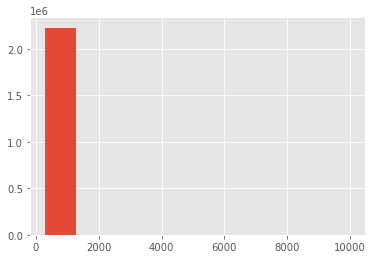

In [224]:
df['credit_score'].hist()

In [225]:
df[df['credit_score'] > 1000]['target'].sum()/df[df['credit_score'] > 1000]['target'].count()
# percent postive when credit score > 1000

0.26272189349112424

In [226]:
df[df['credit_score'] <= 1000]['target'].sum()/df[df['credit_score'] <= 1000]['target'].count()
# percent postive when credit score <= 1000

0.13741522810997925

In [227]:
df[df['credit_score'] > 1000]['target'].count() / df.shape[0]

0.0011371557916892078

In [228]:
df[df['credit_score'] > 1000]

,Unnamed: 0,credit_score,first_payment_date,first_time_homebuyer_flag,maturity_date,mortgage_insurance_percentage_(mi_%),number_of_units,occupancy_status,original_combined_loan-to-value_(cltv),original_debt-to-income_(dti)_ratio,...,loan_sequence_number,loan_purpose,original_loan_term,number_of_borrowers,seller_name,servicer_name,program_indicator,property_valuation_method,interest_only_indicator_(i/o_indicator),target
11,11,9999,200512,Y,203511,0,1,P,100,24,...,F05Q40000560,P,360,1,Other sellers,Other servicers,Unknown,9,N,0.0
495,495,9999,200512,Y,203511,0,1,P,103,41,...,F05Q40003820,P,360,1,Other sellers,Other servicers,Unknown,9,N,1.0
916,916,9999,200512,N,203511,0,1,P,100,31,...,F05Q40004650,P,360,1,Other sellers,Other servicers,Unknown,9,N,1.0
994,994,9999,200511,Y,203510,0,1,P,80,38,...,F05Q40004789,P,360,1,"COUNTRYWIDE HOME LOANS, INC.","BANK OF AMERICA, N.A.",Unknown,9,N,0.0
1182,1182,9999,200601,Y,203512,0,1,P,100,21,...,F05Q40005427,P,360,1,Other sellers,"U.S. BANK, N.A.",Unknown,9,N,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2217088,364697,9999,200608,N,203607,0,1,P,80,24,...,F05Q40449000,P,360,1,BRANCH BANKING & TRUST COMPANY,Other servicers,Unknown,9,N,0.0
2217484,365093,9999,200601,N,202012,0,1,S,27,41,...,F05Q40449631,C,180,1,Other sellers,Other servicers,Unknown,9,N,0.0
2217487,365096,9999,200602,N,202101,0,1,P,30,54,...,F05Q40449634,P,180,1,Other sellers,NATIONAL CITY MORTGAGE CO.,Unknown,9,N,0.0
2219529,367138,9999,200611,Y,203610,0,1,P,76,39,...,F05Q40452533,P,360,1,Other sellers,Other servicers,Unknown,9,N,0.0


In [229]:
imp = SimpleImputer(missing_values=9999, strategy='mean')
imp.fit(np.array(df['credit_score']).reshape(-1, 1))
indicator = MissingIndicator(missing_values=9999)
mask_missing_cs = indicator.fit_transform(np.array(df['credit_score']).reshape(-1, 1))
credit_score_mean_imputed = imp.transform(np.array(df['credit_score']).reshape(-1, 1))


In [230]:
df['missing_credit_score'] = mask_missing_cs
df['credit_score'] = credit_score_mean_imputed


In [231]:
df['credit_score'].max()

850.0

In [232]:
df['credit_score'].min()

300.0

<AxesSubplot:>

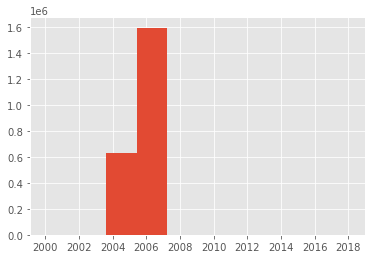

In [233]:
df['first_payment_date'] = pd.to_datetime(df['first_payment_date'], format='%Y%m')
df['first_payment_date'].hist()

In [234]:
df['first_payment_date_year'] = df['first_payment_date'].dt.year
df['first_payment_date_month'] = df['first_payment_date'].dt.month

<AxesSubplot:>

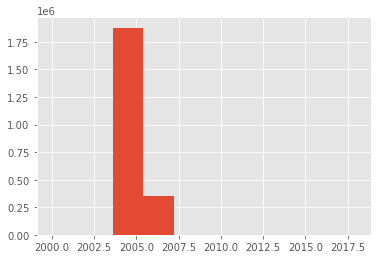

In [235]:
df['first_payment_date_year'].hist()

<AxesSubplot:>

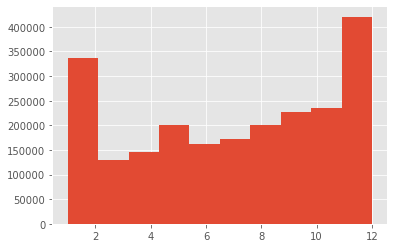

In [236]:
df['first_payment_date_month'].hist()

In [237]:
df.drop(labels='first_payment_date', axis=1, inplace=True)

In [238]:
df.drop(labels='maturity_date', axis=1, inplace=True)

<AxesSubplot:>

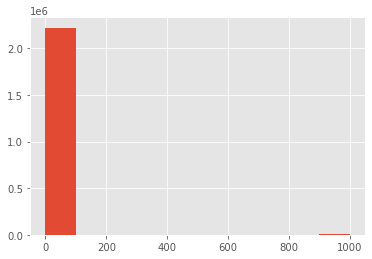

In [239]:
df['mortgage_insurance_percentage_(mi_%)'].hist()

In [240]:
col = 'mortgage_insurance_percentage_(mi_%)'
imp = SimpleImputer(missing_values=999, strategy='mean')
imp.fit(np.array(df[col]).reshape(-1, 1))
indicator = MissingIndicator(missing_values=999)
mask_missing_mi = indicator.fit_transform(np.array(df[col]).reshape(-1, 1))
mi_mean_imputed = imp.transform(np.array(df[col]).reshape(-1, 1))

In [241]:
df['missing_' + col] = mask_missing_mi
df[col] = mi_mean_imputed

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229246 entries, 0 to 2229318
Data columns (total 31 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   Unnamed: 0                                    int64  
 1   credit_score                                  float64
 2   first_time_homebuyer_flag                     object 
 3   mortgage_insurance_percentage_(mi_%)          float64
 4   number_of_units                               int64  
 5   occupancy_status                              object 
 6   original_combined_loan-to-value_(cltv)        int64  
 7   original_debt-to-income_(dti)_ratio           int64  
 8   original_upb                                  int64  
 9   original_loan-to-value_(ltv)                  int64  
 10  original_interest_rate                        float64
 11  channel                                       object 
 12  prepayment_penalty_mortgage_(ppm)_flag        object 
 1

In [243]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [244]:
dict_ = {'number_of_units': {'missing_value': 99, 'strategy':'mean'}
        , 'occupancy_status': {'missing_value': 'Unknown', 'strategy':'most_frequent'}
        , 'original_combined_loan-to-value_(cltv)': {'missing_value': 999, 'strategy':'mean'}
        , 'original_debt-to-income_(dti)_ratio': {'missing_value': 999, 'strategy':'mean'}
        , 'original_loan-to-value_(ltv)': {'missing_value': 999, 'strategy':'mean'}
        , 'channel': {'missing_value': '9', 'strategy':'most_frequent'}
        , 'property_type': {'missing_value': 'Unknown', 'strategy':'most_frequent'}
        , 'loan_purpose': {'missing_value': '9', 'strategy':'most_frequent'}
        , 'number_of_borrowers': {'missing_value': 99, 'strategy':'mean'}}


    

In [245]:
df[dict_.keys()]

,number_of_units,occupancy_status,original_combined_loan-to-value_(cltv),original_debt-to-income_(dti)_ratio,original_loan-to-value_(ltv),channel,property_type,loan_purpose,number_of_borrowers
0,1,P,103,39,103,R,SF,P,1
1,1,P,85,49,80,R,SF,N,2
2,1,P,97,38,55,R,SF,P,1
3,1,P,97,32,97,R,PU,P,1
4,1,P,100,42,100,R,SF,P,1
...,...,...,...,...,...,...,...,...,...
2229314,1,P,47,55,47,R,MH,N,2
2229315,1,P,97,35,97,R,SF,P,1
2229316,1,P,97,43,97,R,SF,P,1
2229317,1,P,77,41,77,R,SF,N,2


In [246]:
for col in dict_.keys():
    kwargs = dict_[col]
    missing_val = kwargs['missing_value']
    strategy = kwargs['strategy']
    print(col, kwargs)

    imp = SimpleImputer(missing_values=missing_val, strategy=strategy)
    imp.fit(np.array(df[col].sample(10_000)).reshape(-1, 1))
    
    indicator = MissingIndicator(missing_values=missing_val)
    
    mask_missing = indicator.fit_transform(np.array(df[col]).reshape(-1, 1))
    imputed = imp.transform(np.array(df[col]).reshape(-1, 1))
    
    try:
        if mask_missing:
            df['mask_missing_' + col] = mask_missing
        else:
            df['mask_missing_' + col] = np.zeros(df.shape[0])
    except ValueError:
        df['mask_missing_' + col] = np.zeros(df.shape[0])
    df[col + '_' + strategy + '_imputed'] = imputed

number_of_units {'missing_value': 99, 'strategy': 'mean'}
occupancy_status {'missing_value': 'Unknown', 'strategy': 'most_frequent'}


/home/austin/anaconda3/envs/dsienv/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  app.launch_new_instance()


original_combined_loan-to-value_(cltv) {'missing_value': 999, 'strategy': 'mean'}
original_debt-to-income_(dti)_ratio {'missing_value': 999, 'strategy': 'mean'}
original_loan-to-value_(ltv) {'missing_value': 999, 'strategy': 'mean'}
channel {'missing_value': '9', 'strategy': 'most_frequent'}
property_type {'missing_value': 'Unknown', 'strategy': 'most_frequent'}
loan_purpose {'missing_value': '9', 'strategy': 'most_frequent'}
number_of_borrowers {'missing_value': 99, 'strategy': 'mean'}


/home/austin/anaconda3/envs/dsienv/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  app.launch_new_instance()


In [247]:
df.drop(labels=dict_.keys(), axis=1, inplace=True)

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229246 entries, 0 to 2229318
Data columns (total 39 columns):
 #   Column                                               Dtype  
---  ------                                               -----  
 0   credit_score                                         float64
 1   first_time_homebuyer_flag                            object 
 2   mortgage_insurance_percentage_(mi_%)                 float64
 3   original_upb                                         int64  
 4   original_interest_rate                               float64
 5   prepayment_penalty_mortgage_(ppm)_flag               object 
 6   amortization_type                                    object 
 7   property_state                                       object 
 8   postal_code                                          int64  
 9   loan_sequence_number                                 object 
 10  original_loan_term                                   int64  
 11  seller_name             

In [249]:
dummy_cols = ['first_time_homebuyer_flag', 'prepayment_penalty_mortgage_(ppm)_flag'
              , 'amortization_type', 'program_indicator', 'property_valuation_method'
              , 'interest_only_indicator_(i/o_indicator)', 'occupancy_status_most_frequent_imputed'
              , 'channel_most_frequent_imputed', 'property_type_most_frequent_imputed'
              , 'loan_purpose_most_frequent_imputed']
df = pd.get_dummies(df, columns=dummy_cols, drop_first=True, dummy_na=True)

In [250]:
df.drop(labels=['property_state', 'postal_code', 'loan_sequence_number', 'seller_name', 'servicer_name']
        , axis=1, inplace=True) # cardinaltiy too high

In [251]:
df.shape

(2229246, 51)

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229246 entries, 0 to 2229318
Data columns (total 51 columns):
 #   Column                                               Dtype  
---  ------                                               -----  
 0   credit_score                                         float64
 1   mortgage_insurance_percentage_(mi_%)                 float64
 2   original_upb                                         int64  
 3   original_interest_rate                               float64
 4   original_loan_term                                   int64  
 5   target                                               float64
 6   missing_credit_score                                 bool   
 7   first_payment_date_year                              int64  
 8   first_payment_date_month                             int64  
 9   missing_mortgage_insurance_percentage_(mi_%)         bool   
 10  mask_missing_number_of_units                         float64
 11  number_of_units_mean_imp

In [253]:
df.isnull().sum()

credit_score                                           0
mortgage_insurance_percentage_(mi_%)                   0
original_upb                                           0
original_interest_rate                                 0
original_loan_term                                     0
target                                                 0
missing_credit_score                                   0
first_payment_date_year                                0
first_payment_date_month                               0
missing_mortgage_insurance_percentage_(mi_%)           0
mask_missing_number_of_units                           0
number_of_units_mean_imputed                           0
mask_missing_occupancy_status                          0
mask_missing_original_combined_loan-to-value_(cltv)    0
original_combined_loan-to-value_(cltv)_mean_imputed    0
mask_missing_original_debt-to-income_(dti)_ratio       0
original_debt-to-income_(dti)_ratio_mean_imputed       0
mask_missing_original_loan-to-v

In [254]:
df.to_csv('../data/df_preprocessed_freddie_mac_2005.csv')